In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df  = pd.read_excel("mental_health_data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555361 entries, 0 to 555360
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0.1  555361 non-null  int64 
 1   Unnamed: 0    555361 non-null  int64 
 2   Date          555361 non-null  object
 3   ID            555361 non-null  int64 
 4   url           555361 non-null  object
 5   username      555361 non-null  object
 6   source        555361 non-null  object
 7   location      480618 non-null  object
 8   tweet         555361 non-null  object
 9   num_of_likes  555361 non-null  int64 
 10  num_of_rt     555361 non-null  int64 
 11  followers     555361 non-null  int64 
 12  replies       555361 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 55.1+ MB


In [4]:
df.shape

(555361, 13)

In [5]:
na_counts = df.isna().sum()
print(na_counts)


Unnamed: 0.1        0
Unnamed: 0          0
Date                0
ID                  0
url                 0
username            0
source              0
location        74743
tweet               0
num_of_likes        0
num_of_rt           0
followers           0
replies             0
dtype: int64


In [6]:
df['location'].fillna('Unknown', inplace=True)

C:\Users\Fuzail chudghar\AppData\Local\Temp\ipykernel_3000\4005551596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Unknown', inplace=True)


In [7]:
df['location'] = df['location'].fillna('Unknown')

In [8]:
na_counts = df.isna().sum()
print(na_counts)

Unnamed: 0.1    0
Unnamed: 0      0
Date            0
ID              0
url             0
username        0
source          0
location        0
tweet           0
num_of_likes    0
num_of_rt       0
followers       0
replies         0
dtype: int64


In [9]:
print(df['location'].isna().sum())  


0


In [10]:
df.drop("ID", axis=1, inplace=True)
df.drop("url", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 0.1", axis=1, inplace=True)
df.drop("source",axis = 1, inplace =True)

In [11]:
df.head()

,Date,username,location,tweet,num_of_likes,num_of_rt,followers,replies
0,2017-12-30 14:50:06+00:00,emc_uk,London,Reflecting back to our #MentalHealthAwareness ...,6,4,21493,0
1,2017-12-30 10:14:42+00:00,WearyWithToil,She/Her | Cis,Here are some thoughts I shared in May for Men...,0,1,1979,1
2,2017-12-30 06:28:27+00:00,worldIinebeta,with the nearest dog,@Mort3mer A livestream or video? My high schoo...,0,0,119,0
3,2017-12-29 23:03:04+00:00,SarahMarieGraye,"Canterbury, UK",@Shylasopinions @trigger_press 14-20 May is Me...,2,1,4107,0
4,2017-12-29 22:24:26+00:00,emmxrtal,"Cheshire, UK",Mental #Health Awareness Week 2017 https://t.c...,0,0,4397,0


In [12]:
unique_username_count = df['username'].nunique()
print(f"Unique usernames count: {unique_username_count}")

Unique usernames count: 226093


In [13]:
df.describe()

,num_of_likes,num_of_rt,followers,replies
count,555361.000000,555361.000000,5.553610e+05,555361.000000
mean,7.490459,2.480369,1.703899e+04,0.427805
std,111.958426,29.314119,3.490170e+05,8.549001
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,4.000000e+02,0.000000
50%,2.000000,0.000000,1.312000e+03,0.000000
75%,5.000000,2.000000,4.215000e+03,0.000000
max,47566.000000,8012.000000,8.483486e+07,2570.000000


In [14]:
sorted_df_like = df.sort_values(by='num_of_likes', ascending=False)
print(sorted_df_like.iloc[0]['tweet'])

sorted_df_rt = df.sort_values(by='num_of_rt', ascending=False)
print(sorted_df_rt.iloc[0]['tweet'])
sorted_df_rp = df.sort_values(by='replies', ascending=False)
print(sorted_df_rp.iloc[0]['tweet'])
sorted_df_fl = df.sort_values(by='followers', ascending=False)
print(sorted_df_fl.iloc[0]['tweet'])

hey itâ€™s #MentalHealthAwarenessWeek our governments should be aware that bad mental health isnâ€™t something just to cure once people have already broken down - we should try to prevent it through proper support (funding) and living in a fairer society
Itâ€™s Mental Health Awareness Week, so I thought Iâ€™d post this. https://t.co/6Uo0xNcNBQ
Last night we lit Downing Street in green to mark the start of #MentalHealthAwarenessWeek.

We must all work together to make sure that looking after our mental health is as natural and positive as looking after our physical health. https://t.co/PRBDPXYnc0
This is the #MentalHealthMinute, an important message to support @heads_together &amp; the UKâ€™s #MentalHealthAwarenessWeek. Wherever you are, whatever youâ€™re feeling, @BTWFoundation and I want you to know itâ€™s ok to say. https://t.co/VsL5YDvhpL


In [15]:
def label_mental_health(tweet):
    mental_health_keywords = [
        'anxiety', 'depression', 'stress', 'trauma', 'mental health', 'overwhelmed','loss',
        'struggling', 'sad', 'upset', 'lonely', 'isolation', 'numb', 'mood swings',
        'fatigue', 'burnout', 'panic', 'self-harm', 'suicidal', 'therapy', 'counseling',
        'support', 'recovery', 'mindfulness', 'wellness', 'resilience',
        'self-care', 'happiness', 'hope', 'positivity','worry','overwhelmed'
        "can't cope", "feeling hopeless", "I need help", "life feels heavy",
        "can't get out of bed", "struggling to breathe", "mental breakdown",
        "it's hard to focus", "I feel lost", "feeling empty",'mental health']
    return 1 if any(keyword in tweet.lower() for keyword in mental_health_keywords) else 0


df['label'] = df['tweet'].apply(label_mental_health)
label_distribution = df['label'].value_counts()

In [16]:
df.head()

,Date,username,location,tweet,num_of_likes,num_of_rt,followers,replies,label
0,2017-12-30 14:50:06+00:00,emc_uk,London,Reflecting back to our #MentalHealthAwareness ...,6,4,21493,0,1
1,2017-12-30 10:14:42+00:00,WearyWithToil,She/Her | Cis,Here are some thoughts I shared in May for Men...,0,1,1979,1,1
2,2017-12-30 06:28:27+00:00,worldIinebeta,with the nearest dog,@Mort3mer A livestream or video? My high schoo...,0,0,119,0,1
3,2017-12-29 23:03:04+00:00,SarahMarieGraye,"Canterbury, UK",@Shylasopinions @trigger_press 14-20 May is Me...,2,1,4107,0,1
4,2017-12-29 22:24:26+00:00,emmxrtal,"Cheshire, UK",Mental #Health Awareness Week 2017 https://t.c...,0,0,4397,0,0


In [17]:
df.loc[df['num_of_rt'] == 2, 'num_of_rt'] = 3

In [18]:
print(label_distribution)

label
1    331265
0    224096
Name: count, dtype: int64


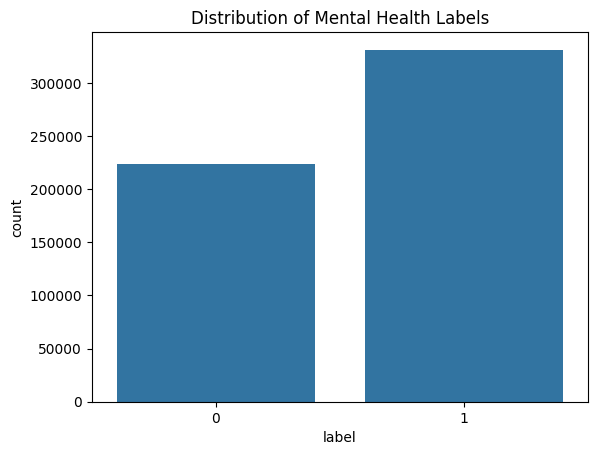

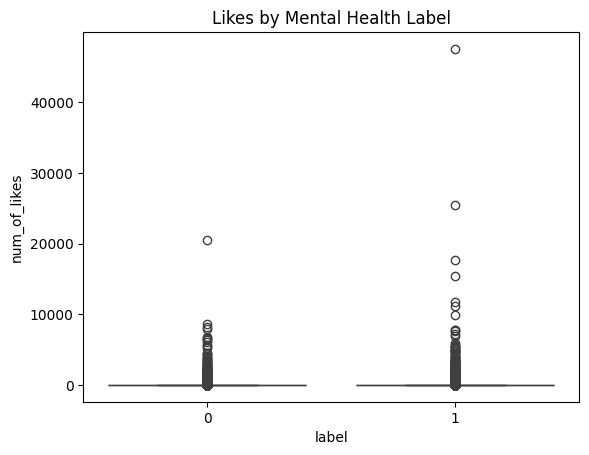

In [19]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Mental Health Labels')
plt.savefig('dist_MH_Label.png')
plt.show()


sns.boxplot(x='label', y='num_of_likes', data=df)
plt.title('Likes by Mental Health Label')
plt.savefig('Like_by_label.png')
plt.show()

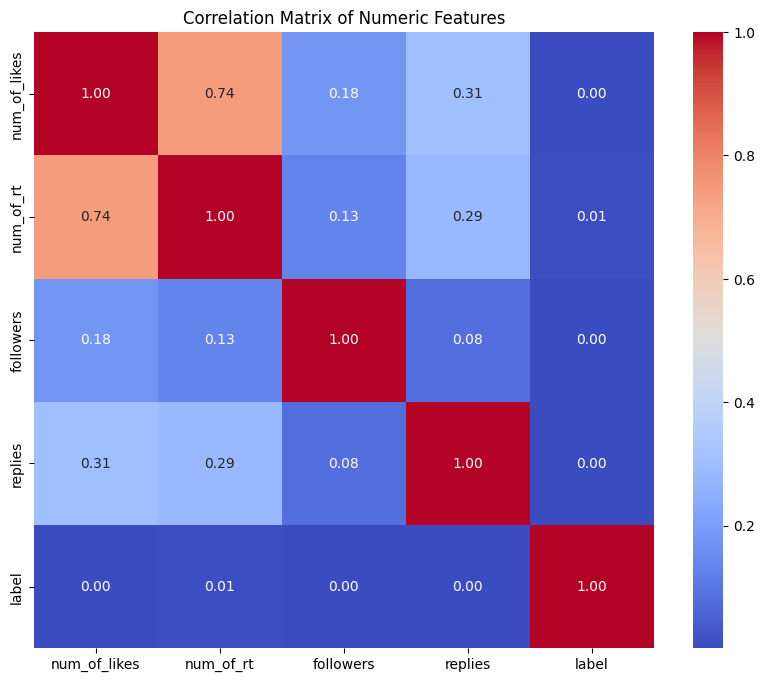

In [20]:
numeric_df = df.select_dtypes(include='number')


correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Numeric Features')
plt.savefig("correlation.png")
plt.show()


In [21]:
df['location'] = df['location'].astype(str)
df['username'] = df['username'].astype(str)

df["location"].fillna("unknown")
user_counts = df.groupby('location')['username'].nunique().sort_values(ascending=False)
print(user_counts)



location
Unknown                     38938
London, England              8330
United Kingdom               6598
London                       6389
UK                           4275
                            ...  
Lewisberry, PA                  1
Battersea, UK                   1
Lewisham High St, London        1
Lewisham London                 1
ð“‹¹                            1
Name: username, Length: 52267, dtype: int64


In [22]:
!pip install wordcloud 




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


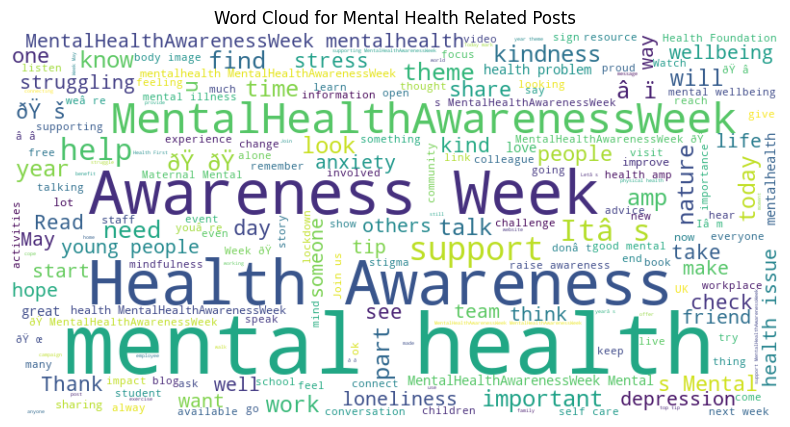

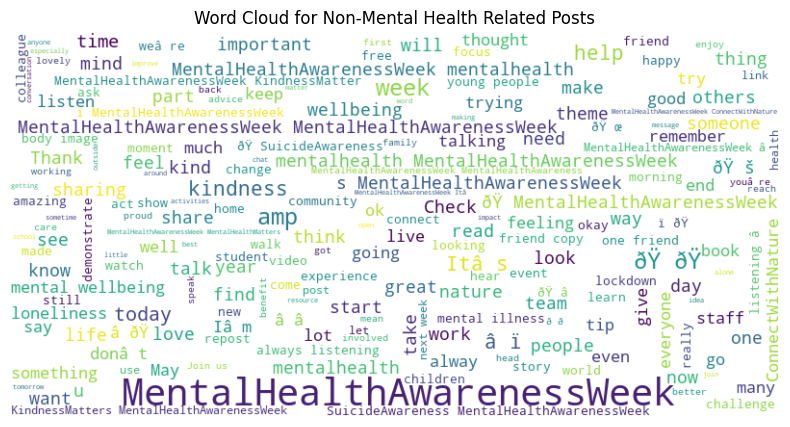

In [23]:
import re
from wordcloud import WordCloud
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for label 1
# Assuming your tweet data is in a column named 'post'
df['cleaned_post'] = df['tweet'].apply(remove_urls)

text_label_1 = ' '.join(df[df['label'] == 1]['cleaned_post'])
generate_wordcloud(text_label_1, title='Word Cloud for Mental Health Related Posts')

# Generate word cloud for label 0
text_label_0 = ' '.join(df[df['label'] == 0]['cleaned_post'])
generate_wordcloud(text_label_0, title='Word Cloud for Non-Mental Health Related Posts')


       num_of_likes  num_of_rt
label                         
0          7.320617   2.363215
1          7.605355   2.717561


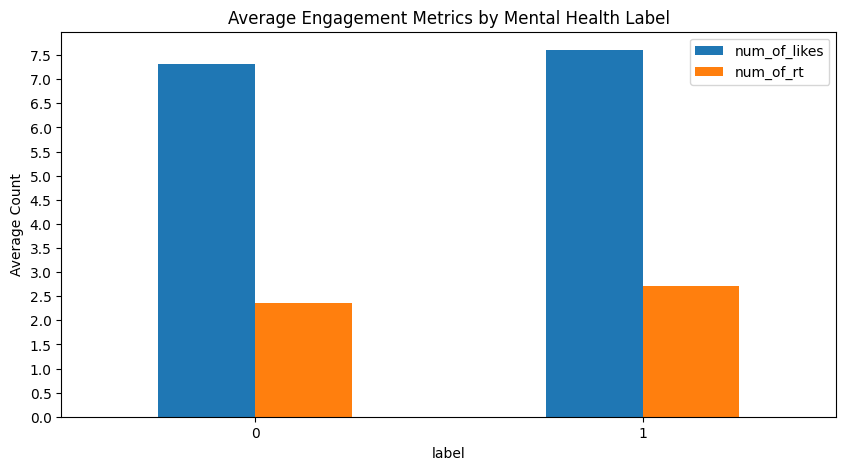

In [24]:

engagement_metrics = df.groupby('label')[['num_of_likes', 'num_of_rt']].mean()
print(engagement_metrics)

engagement_metrics.plot(kind='bar', figsize=(10, 5))
plt.title('Average Engagement Metrics by Mental Health Label')
plt.ylabel('Average Count')
plt.yticks(np.arange(0,8,0.5))
plt.xticks(ticks=[0,1], labels=['0', '1'], rotation=0)
plt.savefig('avg_Engagement_by_label')
plt.show()


label
0    7.320617
1    7.605355
Name: num_of_likes, dtype: float64


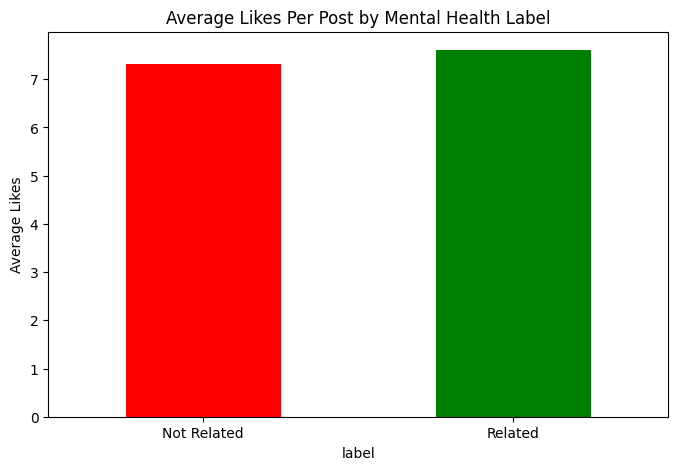

In [25]:

average_likes = df.groupby('label')['num_of_likes'].mean()
print(average_likes)


average_likes.plot(kind='bar', color=['red', 'green'], figsize=(8, 5))
plt.title('Average Likes Per Post by Mental Health Label')
plt.ylabel('Average Likes')
plt.xticks(ticks=[0, 1], labels=['Not Related', 'Related'], rotation=0)
plt.show()


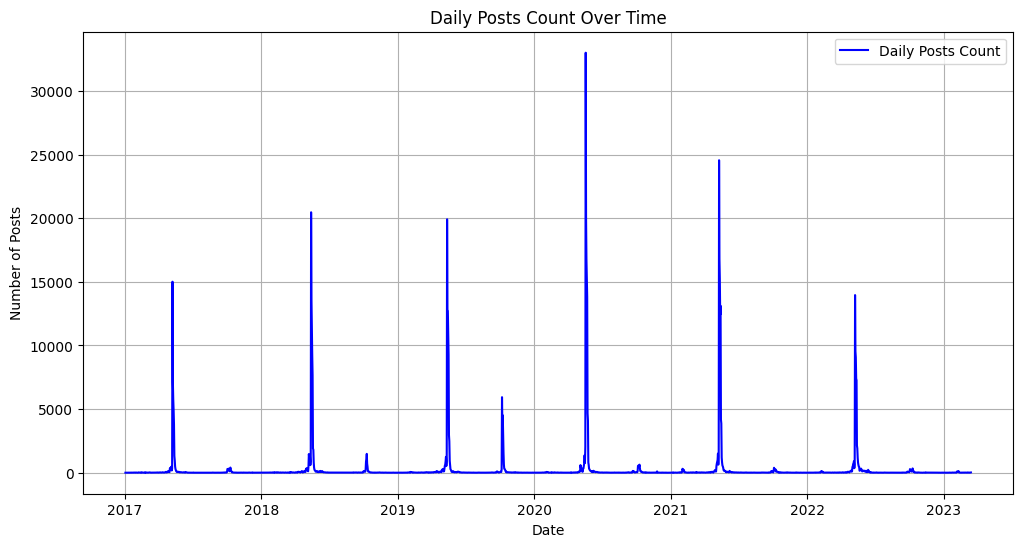

In [26]:

df.Date=df.Date.apply(pd.to_datetime)

df["month"]=df.Date.dt.month
df["year"]=df.Date.dt.year
df["Day"]=df.Date.dt.day
df['Hour'] = df.Date.dt.hour
df['Day_of_week'] = df.Date.dt.day_name()


#df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)


daily_trend = df.resample('D').count()['label']


plt.figure(figsize=(12, 6))
plt.plot(daily_trend.index, daily_trend, label='Daily Posts Count', color='blue')
plt.title('Daily Posts Count Over Time')
plt.ylabel('Number of Posts')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()


In [27]:
df[df["year"] == 2022].head()

,username,location,tweet,num_of_likes,num_of_rt,followers,replies,label,cleaned_post,month,year,Day,Hour,Day_of_week
Date,,,,,,,,,,,,,,
2022-12-31 14:24:59+00:00,NewhamMuslims,Newham,"May 2022\n\nDuring ""Mental Health Awareness We...",1,0,797,1,1,"May 2022\n\nDuring ""Mental Health Awareness We...",12,2022,31,14,Saturday
2022-12-31 13:58:04+00:00,createspacesco,Liverpool,For @Liverpool_ONEâ€™s #MentalHealthAwarenessW...,1,0,2005,1,0,For @Liverpool_ONEâ€™s #MentalHealthAwarenessW...,12,2022,31,13,Saturday
2022-12-31 10:17:00+00:00,Propulsion_Swim,United Kingdom,"In an open, honest and powerful episode we wer...",1,0,4007,1,1,"In an open, honest and powerful episode we wer...",12,2022,31,10,Saturday
2022-12-30 14:30:04+00:00,SoHappyInTown,"London, England",Let's talk about mental health &amp; remove th...,0,0,2272,0,1,Let's talk about mental health &amp; remove th...,12,2022,30,14,Friday
2022-12-29 11:00:38+00:00,CleanBrk,Unknown,During Mental Health Awareness Week in 2022 we...,1,0,16304,0,1,During Mental Health Awareness Week in 2022 we...,12,2022,29,11,Thursday


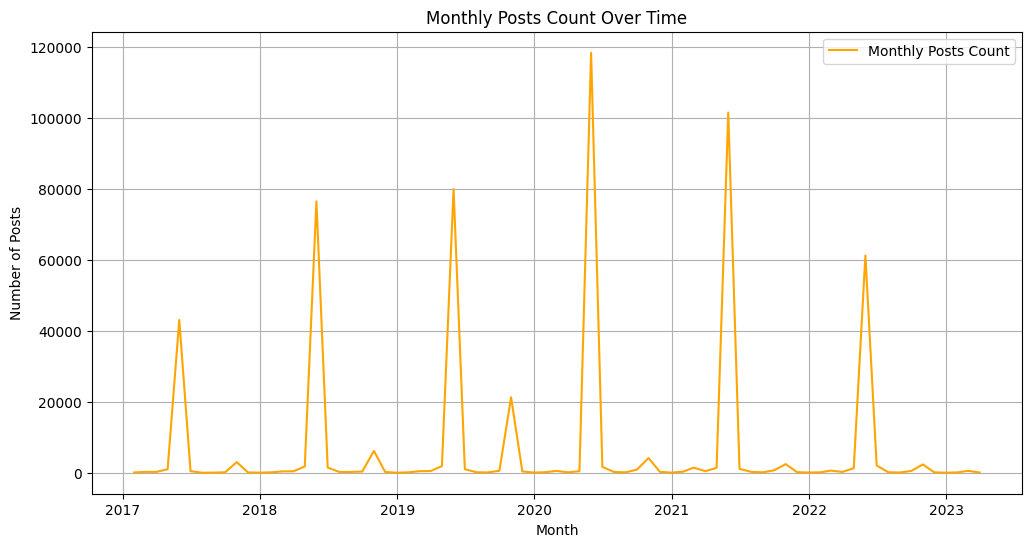

In [28]:
# Resampling to get monthly counts of posts by label
monthly_trend = df.resample('ME').count()['label']

plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend, label='Monthly Posts Count', color='orange')
plt.title('Monthly Posts Count Over Time')
plt.ylabel('Number of Posts')
plt.xlabel('Month')
plt.legend()
plt.grid()
plt.show()


In [29]:
print(df.columns)


Index(['username', 'location', 'tweet', 'num_of_likes', 'num_of_rt',
       'followers', 'replies', 'label', 'cleaned_post', 'month', 'year', 'Day',
       'Hour', 'Day_of_week'],
      dtype='object')


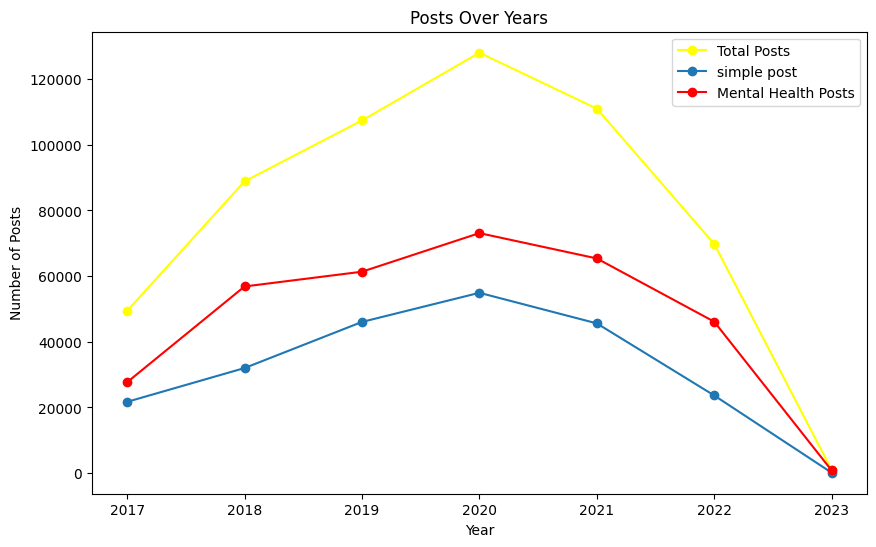

In [30]:


# Count the number of posts per year/month/day
posts_by_year = df.groupby('year').size()
posts_by_month = df.groupby(['year', 'month']).size()
posts_by_day = df.groupby(['year', 'month', 'Day']).size()

simple_post = df[df['label'] == 0]
mental_health_posts = df[df['label'] == 1]
mh_posts_by_year = mental_health_posts.groupby('year').size()
mh_posts_by_month = mental_health_posts.groupby(['year', 'month']).size()
mh_posts_by_day = mental_health_posts.groupby(['year', 'month', 'Day']).size()
sm_posts_by_year = simple_post.groupby('year').size()



plt.figure(figsize=(10,6))
plt.plot(posts_by_year, marker='o', label='Total Posts',color = 'yellow')
plt.plot(sm_posts_by_year, marker='o', label='simple post')
plt.plot(mh_posts_by_year, marker='o', label='Mental Health Posts', color='red')
plt.title('Posts Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend()
plt.savefig('post_by_years.png')
plt.show()




<Figure size 1200x600 with 0 Axes>

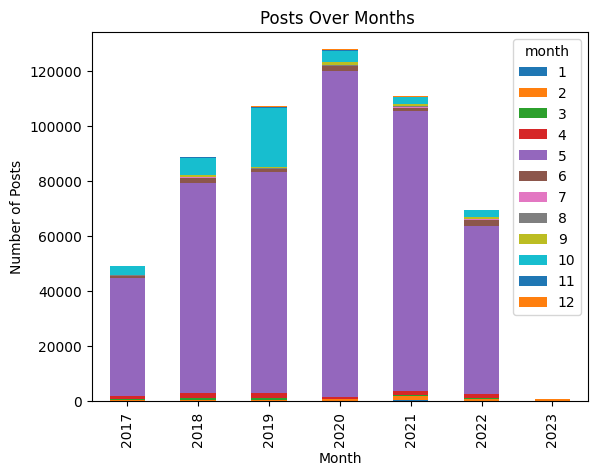

In [31]:
plt.figure(figsize=(12,6))
posts_by_month.unstack().plot(kind='bar', stacked=True)
plt.title('Posts Over Months ')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.savefig('post_by_month.png')
plt.show()

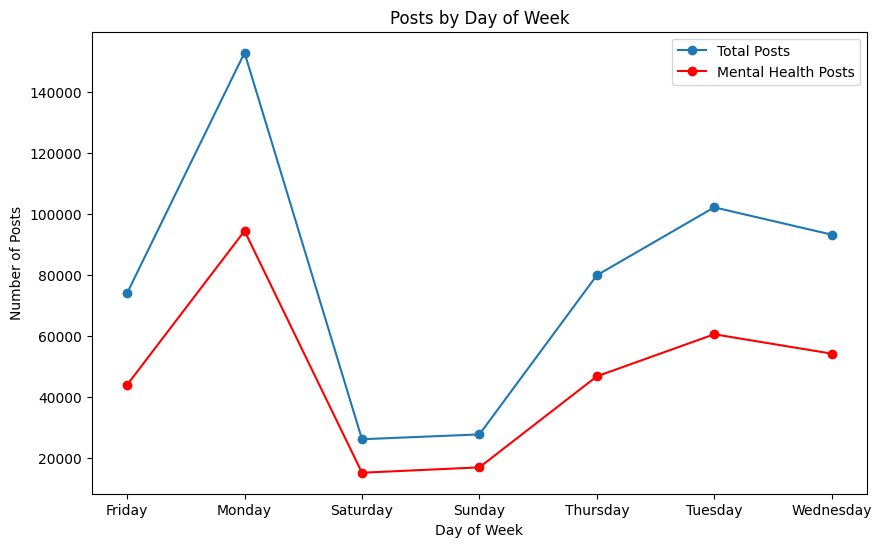

In [32]:
posts_by_day_of_week = df.groupby('Day_of_week').size().sort_index()
mh_posts_by_day_of_week = mental_health_posts.groupby('Day_of_week').size().sort_index()

plt.figure(figsize=(10,6))
plt.plot(posts_by_day_of_week, marker='o', label='Total Posts')
plt.plot(mh_posts_by_day_of_week, marker='o', label='Mental Health Posts', color='red')
plt.title('Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Posts')
plt.legend()
plt.savefig('post_by_Day_Week.png')
plt.show()

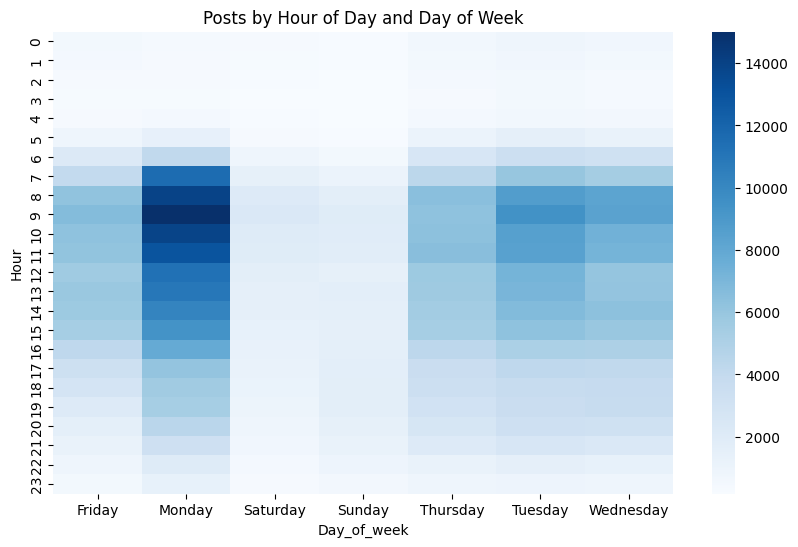

In [33]:
posts_by_hour = df.groupby('Hour').size()
mh_posts_by_hour = mental_health_posts.groupby('Hour').size()

plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(index='Hour', columns='Day_of_week', aggfunc='size', fill_value=0), cmap="Blues")
plt.title('Posts by Hour of Day and Day of Week')
plt.show()

In [34]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import nltk

In [39]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Fuzail
[nltk_data]     chudghar\AppData\Roaming\nltk_data...


True

In [41]:
sia = SentimentIntensityAnalyzer()

In [43]:
def analyze_sentiment(tweet):
    sentiment_score = sia.polarity_scores(tweet)
    # Classifying sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['tweet'].apply(analyze_sentiment)
df['sentiment_score'] = df['tweet'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

df.head()

,username,location,tweet,num_of_likes,num_of_rt,followers,replies,label,cleaned_post,month,year,Day,Hour,Day_of_week,sentiment,sentiment_score
Date,,,,,,,,,,,,,,,,
2017-12-30 14:50:06+00:00,emc_uk,London,reflecting back to our #mentalhealthawareness ...,6,4,21493,0,1,Reflecting back to our #MentalHealthAwareness ...,12,2017,30,14,Saturday,positive,0.4926
2017-12-30 10:14:42+00:00,WearyWithToil,She/Her | Cis,here are some thoughts i shared in may for men...,0,1,1979,1,1,Here are some thoughts I shared in May for Men...,12,2017,30,10,Saturday,positive,0.3400
2017-12-30 06:28:27+00:00,worldIinebeta,with the nearest dog,@mort3mer a livestream or video? my high schoo...,0,0,119,0,1,@Mort3mer A livestream or video? My high schoo...,12,2017,30,6,Saturday,positive,0.5244
2017-12-29 23:03:04+00:00,SarahMarieGraye,"Canterbury, UK",@shylasopinions @trigger_press 14-20 may is me...,2,1,4107,0,1,@Shylasopinions @trigger_press 14-20 May is Me...,12,2017,29,23,Friday,neutral,0.0000
2017-12-29 22:24:26+00:00,emmxrtal,"Cheshire, UK",mental #health awareness week 2017 https://t.c...,0,0,4397,0,0,Mental #Health Awareness Week 2017,12,2017,29,22,Friday,neutral,0.0000


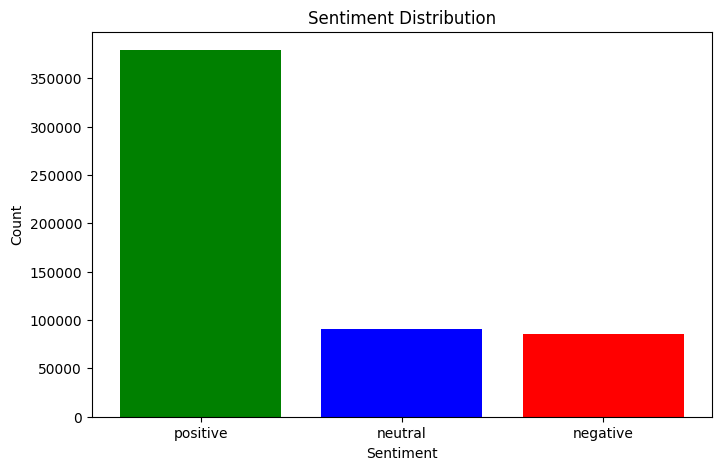

In [44]:

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


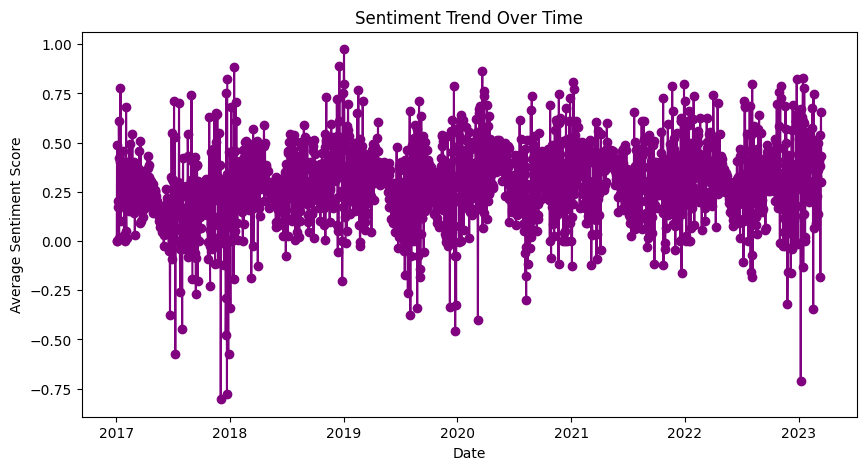

In [47]:

# Group by date and calculate average sentiment score for each day
df_daily_sentiment = df.resample('D')['sentiment_score'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_daily_sentiment.index, df_daily_sentiment.values, marker='o', color='purple')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trend Over Time')
plt.show()


In [48]:
df[df["label"] == 1].head()

,username,location,tweet,num_of_likes,num_of_rt,followers,replies,label,cleaned_post,month,year,Day,Hour,Day_of_week,sentiment,sentiment_score
Date,,,,,,,,,,,,,,,,
2017-12-30 14:50:06+00:00,emc_uk,London,reflecting back to our #mentalhealthawareness ...,6,4,21493,0,1,Reflecting back to our #MentalHealthAwareness ...,12,2017,30,14,Saturday,positive,0.4926
2017-12-30 10:14:42+00:00,WearyWithToil,She/Her | Cis,here are some thoughts i shared in may for men...,0,1,1979,1,1,Here are some thoughts I shared in May for Men...,12,2017,30,10,Saturday,positive,0.3400
2017-12-30 06:28:27+00:00,worldIinebeta,with the nearest dog,@mort3mer a livestream or video? my high schoo...,0,0,119,0,1,@Mort3mer A livestream or video? My high schoo...,12,2017,30,6,Saturday,positive,0.5244
2017-12-29 23:03:04+00:00,SarahMarieGraye,"Canterbury, UK",@shylasopinions @trigger_press 14-20 may is me...,2,1,4107,0,1,@Shylasopinions @trigger_press 14-20 May is Me...,12,2017,29,23,Friday,neutral,0.0000
2017-12-29 08:42:00+00:00,wordsmoothie,"Hitchin, England",mental health awareness week: swimming for med...,0,0,239,0,1,Mental Health Awareness Week: Swimming for Med...,12,2017,29,8,Friday,neutral,0.0000


sentiment  negative   neutral  positive
label                                  
0          0.120123  0.188129  0.691748
1          0.177818  0.145113  0.677068


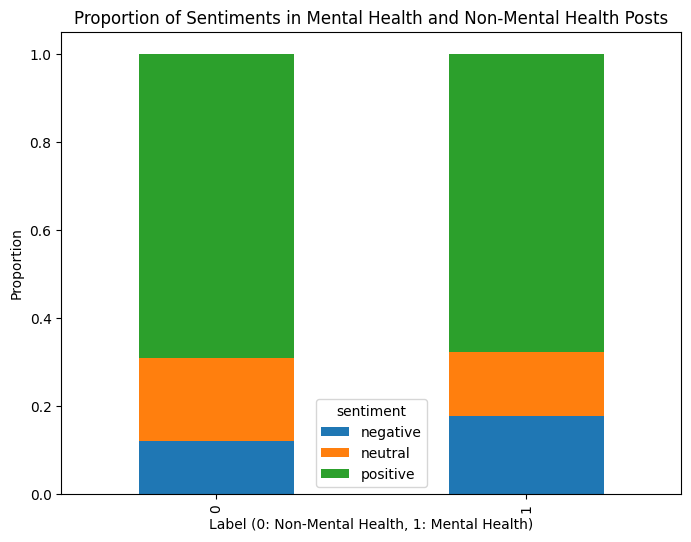

In [49]:

sentiment_label_ct = pd.crosstab(df['label'], df['sentiment'], normalize='index')
print(sentiment_label_ct)
sentiment_label_ct.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Proportion of Sentiments in Mental Health and Non-Mental Health Posts")
plt.xlabel("Label (0: Non-Mental Health, 1: Mental Health)")
plt.ylabel("Proportion")
plt.show()


In [55]:
# Group by sentiment and calculate the average number of like
average_likes_by_sentiment = df.groupby('sentiment')['num_of_likes'].mean()

print(average_likes_by_sentiment)


sentiment
negative    9.611600
neutral     6.197263
positive    7.318146
Name: num_of_likes, dtype: float64


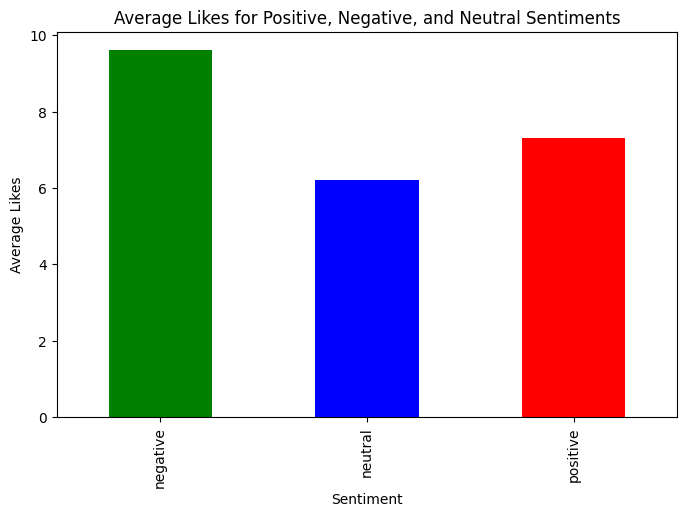

In [56]:

plt.figure(figsize=(8, 5))
average_likes_by_sentiment.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Average Likes')
plt.title('Average Likes for Positive, Negative, and Neutral Sentiments')
plt.show()


In [57]:
average_rt_by_sentiment = df.groupby('sentiment')['num_of_rt'].mean()

print(average_rt_by_sentiment)

sentiment
negative    3.281122
neutral     2.260567
positive    2.489408
Name: num_of_rt, dtype: float64


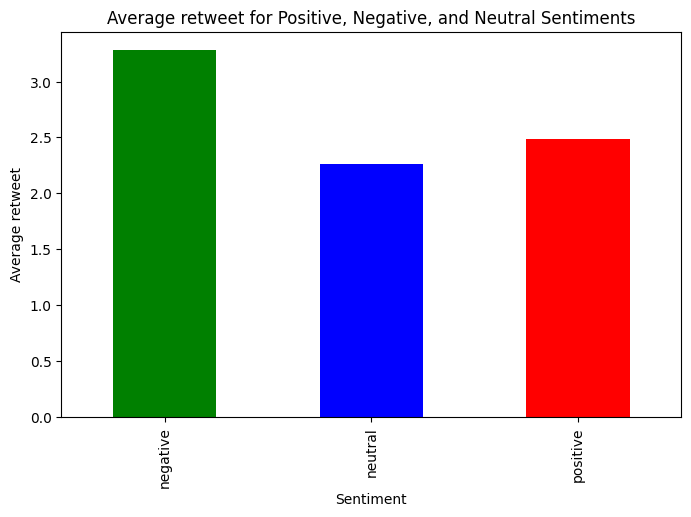

In [58]:
plt.figure(figsize=(8, 5))
average_rt_by_sentiment.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Average retweet')
plt.title('Average retweet for Positive, Negative, and Neutral Sentiments')
plt.show()

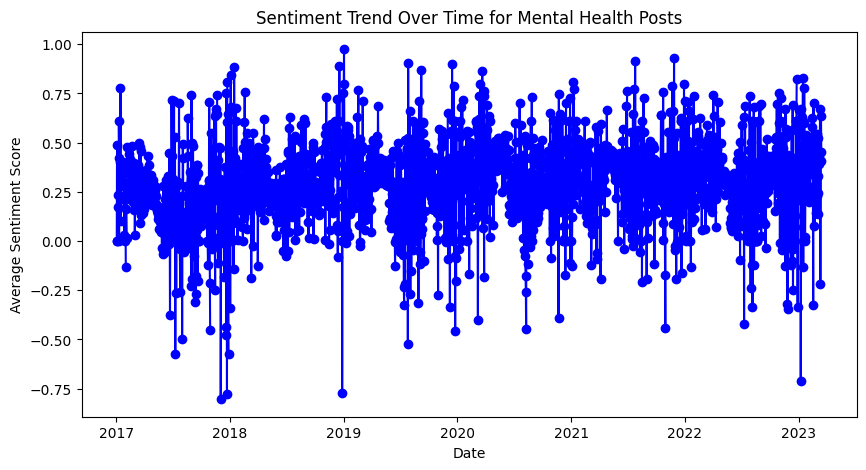

In [62]:

mental_health_posts = df[df['label'] == 1]
df_daily_sentiment = mental_health_posts.resample('D')['sentiment_score'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_daily_sentiment.index, df_daily_sentiment.values, marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trend Over Time for Mental Health Posts')
plt.show()

